# Grab DESI redshift distribution and generate LSST redshift distribution

In [2]:
import os
import sys
sys.path.insert(0, "/global/homes/q/qhang/desi/lya/codes/")
import numpy as np
import healpy as hp
from astropy.io import fits
import healpy
import lya_utils as lu
import pylab as pl

# grab the n(z)

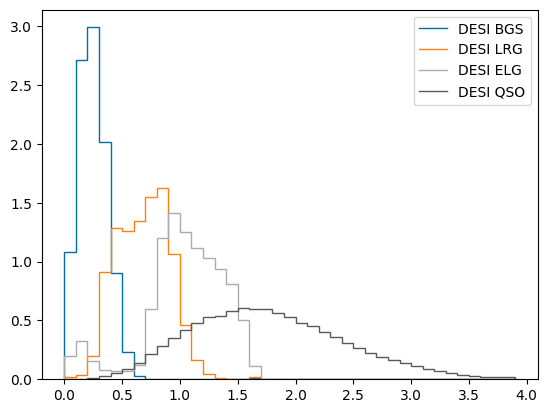

In [41]:
fname = "/global/homes/q/qhang/desi/dr1/nz_bgs_lrg_elg_qso.txt"
desi_nz = np.loadtxt(fname)
desi_label=["DESI BGS","DESI LRG","DESI ELG","DESI QSO"]

# normalize these distributions:
zz = desi_nz[:,0]
dz = zz[1]-zz[0]
edges = np.append(zz-dz/2., zz[-1] + dz/2.)
desi_norm_nz = np.zeros((len(zz),4))
for ii in range(4):
    desi_norm_nz[:,ii] = desi_nz[:,ii+1]/np.sum(desi_nz[:,ii+1])/dz
    pl.stairs(desi_norm_nz[:,ii],edges,label=desi_label[ii])
pl.legend()

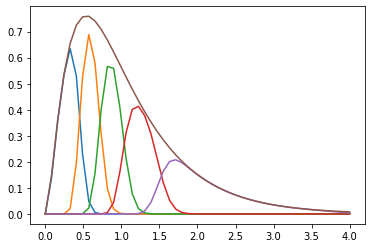

In [2]:
# generate nz of lsst source
n_bins=5
sigma_z = 0.05  # photo-z variance (scatter = 0.05 * (1 + z))
z_bias = 0
# compute srd n(z) for last bin:
redshift_range = np.linspace(0,4,50)
redshift_distribution = lu.srd_tot_nz(redshift_range)
srd_bins = lu.compute_equal_number_bounds(redshift_range, redshift_distribution, n_bins)

# Loop over the bins: each bin is defined by the upper and lower edge of the bin
lsst_nz = np.zeros((len(redshift_range), n_bins))
for ii in range(n_bins):
    x1 = srd_bins[ii]
    x2 = srd_bins[ii+1]
    lsst_nz[:,ii] = lu.true_redshift_distribution(x1, x2, sigma_z, z_bias, 
                                                  redshift_range, redshift_distribution)
    #useind = redshift_range<3
    #target_nz = np.c_[redshift_range[useind], source_nz[useind]]
    pl.plot(redshift_range, lsst_nz[:,ii])
pl.plot(redshift_range, redshift_distribution)

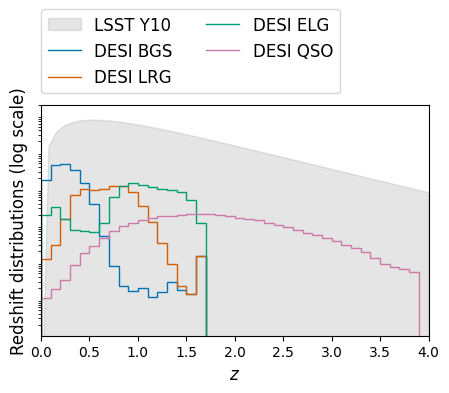

In [109]:
# now let's produce the plot:
# get colormap
pl.style.use('seaborn-colorblind')
pl.figure(figsize=[5,3])
redshift_distribution[0]=1e-9
#pl.plot(redshift_range, redshift_distribution, label="LSST 10 Year",color='salmon')
pl.fill_between(redshift_range,np.zeros(len(redshift_range)), redshift_distribution, 
                label='LSST Y10',
                alpha=0.2,color="grey")
#lsst_dz = redshift_range[1]-redshift_range[0]
#lsst_edges = np.append(redshift_range-lsst_dz/2., redshift_range[-1]+lsst_dz/2.)
#pl.stairs(redshift_distribution, lsst_edges, fill=True, label='LSST 10 Year',
#                alpha=0.2,color="grey")
#pl.plot(redshift_range,lsst_nz[:,-1])
desi_color=[
    "C0",
    "C2",
    "C1",
    "C3",
]
desi_label=[
    "DESI BGS",
    "DESI LRG",
    "DESI ELG",
    "DESI QSO"
]
for ii in range(4):
    pl.stairs(desi_nz[:,ii+1]/1e6*0.025,edges,label=desi_label[ii],color=desi_color[ii])
pl.legend(fontsize=12,ncol=2,loc=[0,1.05])
pl.yscale('log')
pl.yticks([])
pl.xlabel("$z$",fontsize=12)
pl.ylabel("Redshift distributions (log scale)",fontsize=12)
pl.xlim([0,4])
pl.ylim([1e-6,2])
pl.savefig("../plots/nz_lsst_desi.pdf",bbox_inches="tight")

In [54]:
sum(redshift_distribution)

12.249999999999996

In [56]:
0.168/27*sum(redshift_distribution)/sum(desi_nz[:,2]/1e6)

0.02499091711310608

In [110]:
for ii in range(4):
    print(sum(desi_nz[:,1 + ii])/sum(desi_nz[:,2])*0.168)

0.363728509896895
0.168
0.22102531379539064
0.0757123315203261


In [69]:
pl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

# check the u-band dropout LBG redshifts

In [3]:
import pickle

In [4]:
def dump_load(filename):
    with open(filename,'rb') as fin:
        stuff=pickle.load(fin)
        #self.impute = json.load(fin)
    #print('loaded impute ditionary:',filename)
    return stuff

In [5]:
fin = dump_load("/global/homes/q/qhang/desi/lya/uband_dropouts.pkl") # Number density in deg^-2

In [20]:
fin[10]

{'number_density': 1771.5076677254995,
 'z': array([3.200e-03, 3.360e-02, 6.400e-02, 9.440e-02, 1.248e-01, 1.552e-01,
        1.856e-01, 2.160e-01, 2.464e-01, 2.768e-01, 3.072e-01, 3.376e-01,
        3.680e-01, 3.984e-01, 4.288e-01, 4.592e-01, 4.896e-01, 2.000e+00,
        2.100e+00, 2.200e+00, 2.300e+00, 2.400e+00, 2.500e+00, 2.600e+00,
        2.700e+00, 2.800e+00, 2.900e+00, 3.000e+00, 3.100e+00, 3.200e+00,
        3.300e+00, 3.400e+00, 3.500e+00, 3.600e+00, 3.700e+00, 3.800e+00,
        3.900e+00]),
 'pz': array([1.20106275e-03, 1.59137324e-03, 3.73171741e-02, 7.88101333e-02,
        2.56577207e-01, 5.39841403e-01, 1.08913994e+00, 1.05668420e+00,
        7.39872028e-01, 4.69183850e-01, 2.80897139e-01, 1.37406394e-01,
        5.50842011e-02, 1.04555698e-02, 1.13689469e-05, 6.49535905e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.19106447e-03, 2.90309674e-03, 6.80766548e-02, 1.43771075e-01,
        4.68066471e-01, 9.84817252e-01, 1.98688689e+0

Text(0, 0.5, '$n(z)$')

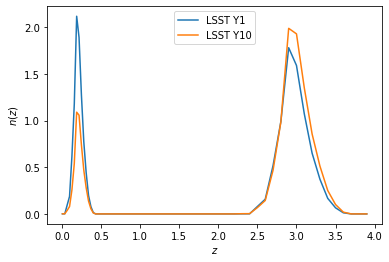

In [6]:
pl.plot(fin[1]['z'],fin[1]['pz'],label="LSST Y1")
pl.plot(fin[10]['z'],fin[10]['pz'],label="LSST Y10")
pl.legend()
pl.xlabel("$z$")
pl.ylabel("$n(z)$")

Text(0, 0.5, '$b(z)$')

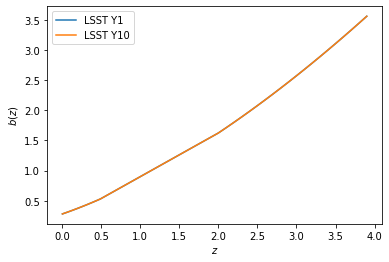

In [10]:
pl.plot(fin[1]['z'],fin[1]['bias'],label="LSST Y1")
pl.plot(fin[10]['z'],fin[10]['bias'],label="LSST Y10")
pl.legend()
pl.xlabel("$z$")
pl.ylabel("$b(z)$")

In [22]:
fin[10]['number_density']/60**2

0.4920854632570832

Text(0.5, 1.0, 'Prediction for LSST Y10')

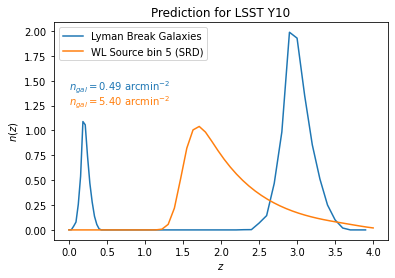

In [26]:
# produce a plot for both:
pl.plot(fin[10]['z'],fin[10]['pz'],label="Lyman Break Galaxies")
pl.plot(redshift_range, lsst_nz[:,4]/sum(lsst_nz[:,4])/(redshift_range[1]-redshift_range[0]), label="WL Source bin 5 (SRD)")
pl.legend()
pl.xlabel("$z$")
pl.ylabel("$n(z)$")
pl.text(0, 1.4, "$n_{gal} = 0.49$ arcmin$^{-2}$",color='C0')
pl.text(0, 1.25, "$n_{gal} = 5.40$ arcmin$^{-2}$",color='C1')
pl.title("Prediction for LSST Y10")

In [15]:
# select a sample file to test number density
# load a patch
root = "/global/cfs/cdirs/desicollab/users/lauracdp/photo-z_box/notebook/new_biasing_model/new_bias_model/box-0/results/"
cat = fits.open(root + "out_srcs_s2_82.fits")
z = cat[1].data['Z_COSMO'] + cat[1].data['DZ_RSD'] 
zsamp = np.linspace(0,2.95,50)
nzlbg = np.interp(zsamp, fin[10]['z'],fin[10]['pz'])

target_dist = np.c_[zsamp, nzlbg]

selection = lu.downsamp_w_target_hist(z, target_dist, seed=123, select_highest=True, scale=None)

In [22]:
# let's save the nzlbg on regular grid:
np.savetxt("nz_lbg_lssty10.txt", target_dist)

In [16]:
selection[0].shape, z.shape

((660421,), (55888829,))

In [17]:
z_selected = z[selection[0]]

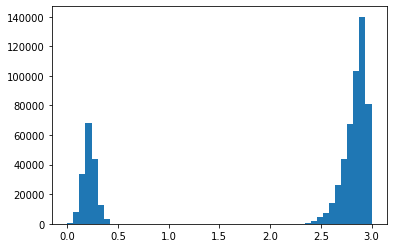

In [18]:
cc = pl.hist(z_selected, bins=50, range=[0,3])

In [19]:
# now compute the number density:
ra = cat[1].data['RA']
dec = cat[1].data['DEC']
nside=512
pix = hp.ang2pix(nside, ra, dec, lonlat=True)
Nunique_pix = len(np.unique(pix))

In [20]:
area_per_pix_arcmin = hp.nside2pixarea(nside, degrees=True)*60**2
tot_area =area_per_pix_arcmin* Nunique_pix

In [21]:
print("num dens: N/arcmin^2", selection[0].shape/tot_area)

num dens: N/arcmin^2 [0.56741005]


This is already very close to the target number density.